In [6]:
from classifier import CLASSIFICATION_MODEL
from preprocess import load_zebra_finch
import numpy as np
from sklearn import metrics
import json
import matplotlib.pyplot as plt

In [2]:
model_directory ="C:/Users/Jayde/Desktop/classifier_2601.1554/classifier_2601.1554/"
spec_path = f"{model_directory}/model_specifications.json"
with open(spec_path, 'r') as f:
  specs = json.load(f)

In [3]:
model = CLASSIFICATION_MODEL(
   n_categories = specs["N Categories"],
   slice_len = specs["Slice Length"]
)

In [4]:
model.classifier.load_weights(f"{model_directory}/classifier{25}")

In [10]:
data_path = "C:/Users/Jayde/Desktop/library/zebra_finch/data/zebra_finch/"
data, labels = load_zebra_finch(data_path, slice_len=specs["Slice Length"], model_path= model_directory, n_types = specs["N Categories"], batch_size=64, equal = True)


obtained 2969 samples
top 5 call types for duration <= 0.37151927437641724: ['Te', 'DC', 'Ne', 'Th', 'Tu']
DC    240
Ne    240
Te    240
Th    240
Tu    240
Name: call_type, dtype: int64
reduced to 1200 training samlples


In [11]:
pred_labels = np.argmax(model.classifier.predict(data), axis=1)
real_labels = np.argmax(labels, axis=1)

38/38 [==============================] - 30s 786ms/step


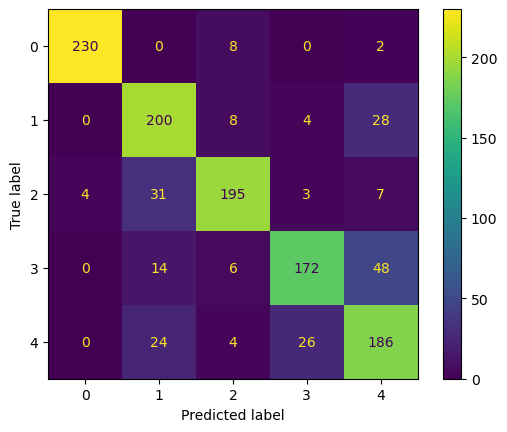

In [13]:
confusion_matrix = metrics.confusion_matrix(real_labels, pred_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
fig_dir = f"{model_directory}/confusionmatrix.png"
plt.savefig(fig_dir, dpi= 300, bbox_inches = "tight", transparent = True)
plt.show()